In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 136s 1us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Using softmax here
])

/Users/rujutabhanose/Documents/Deep Learning/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Correct match
              metrics=['accuracy'])

In [10]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=30,
                    validation_data=(test_images, test_labels))

/Users/rujutabhanose/Documents/Deep Learning/.venv/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 68ms/step - accuracy: 0.4117 - loss: 1.7258 - val_accuracy: 0.5551 - val_loss: 1.2361
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.5336 - loss: 1.3165 - val_accuracy: 0.5640 - val_loss: 1.2589
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.5846 - loss: 1.1852 - val_accuracy: 0.5879 - val_loss: 1.1567
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6137 - loss: 1.1029 - val_accuracy: 0.6362 - val_loss: 1.0429
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6413 - loss: 1.0352 - val_accuracy: 0.6520 - val_loss: 1.0226
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6606 - loss: 0.9810 - val_accuracy: 0.6685 - val_loss: 0.9725
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6709 - loss: 0.9455 - val_accuracy: 0.6629 - val_loss: 0.9838
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.6848 - loss: 0.9137 - 

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.7712 - loss: 0.7203
Test accuracy: 0.7712000012397766


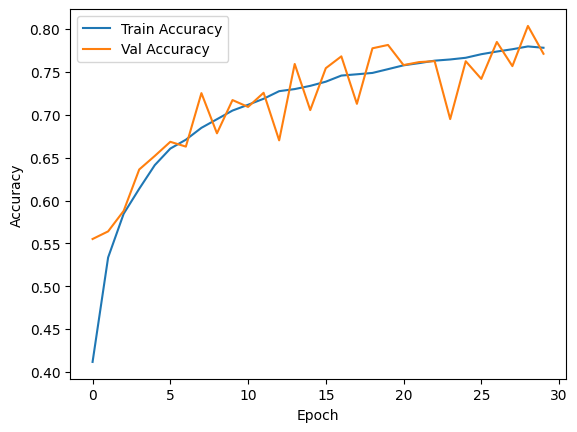

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to CIFAR-10 size
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")


In [20]:
image_path = "/Users/rujutabhanose/Documents/Deep Learning/Assignment_2/airplane.webp"

try:
    predict_image(image_path)
except FileNotFoundError:
    print(f"Error: File not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: airplane (Confidence: 0.93)
